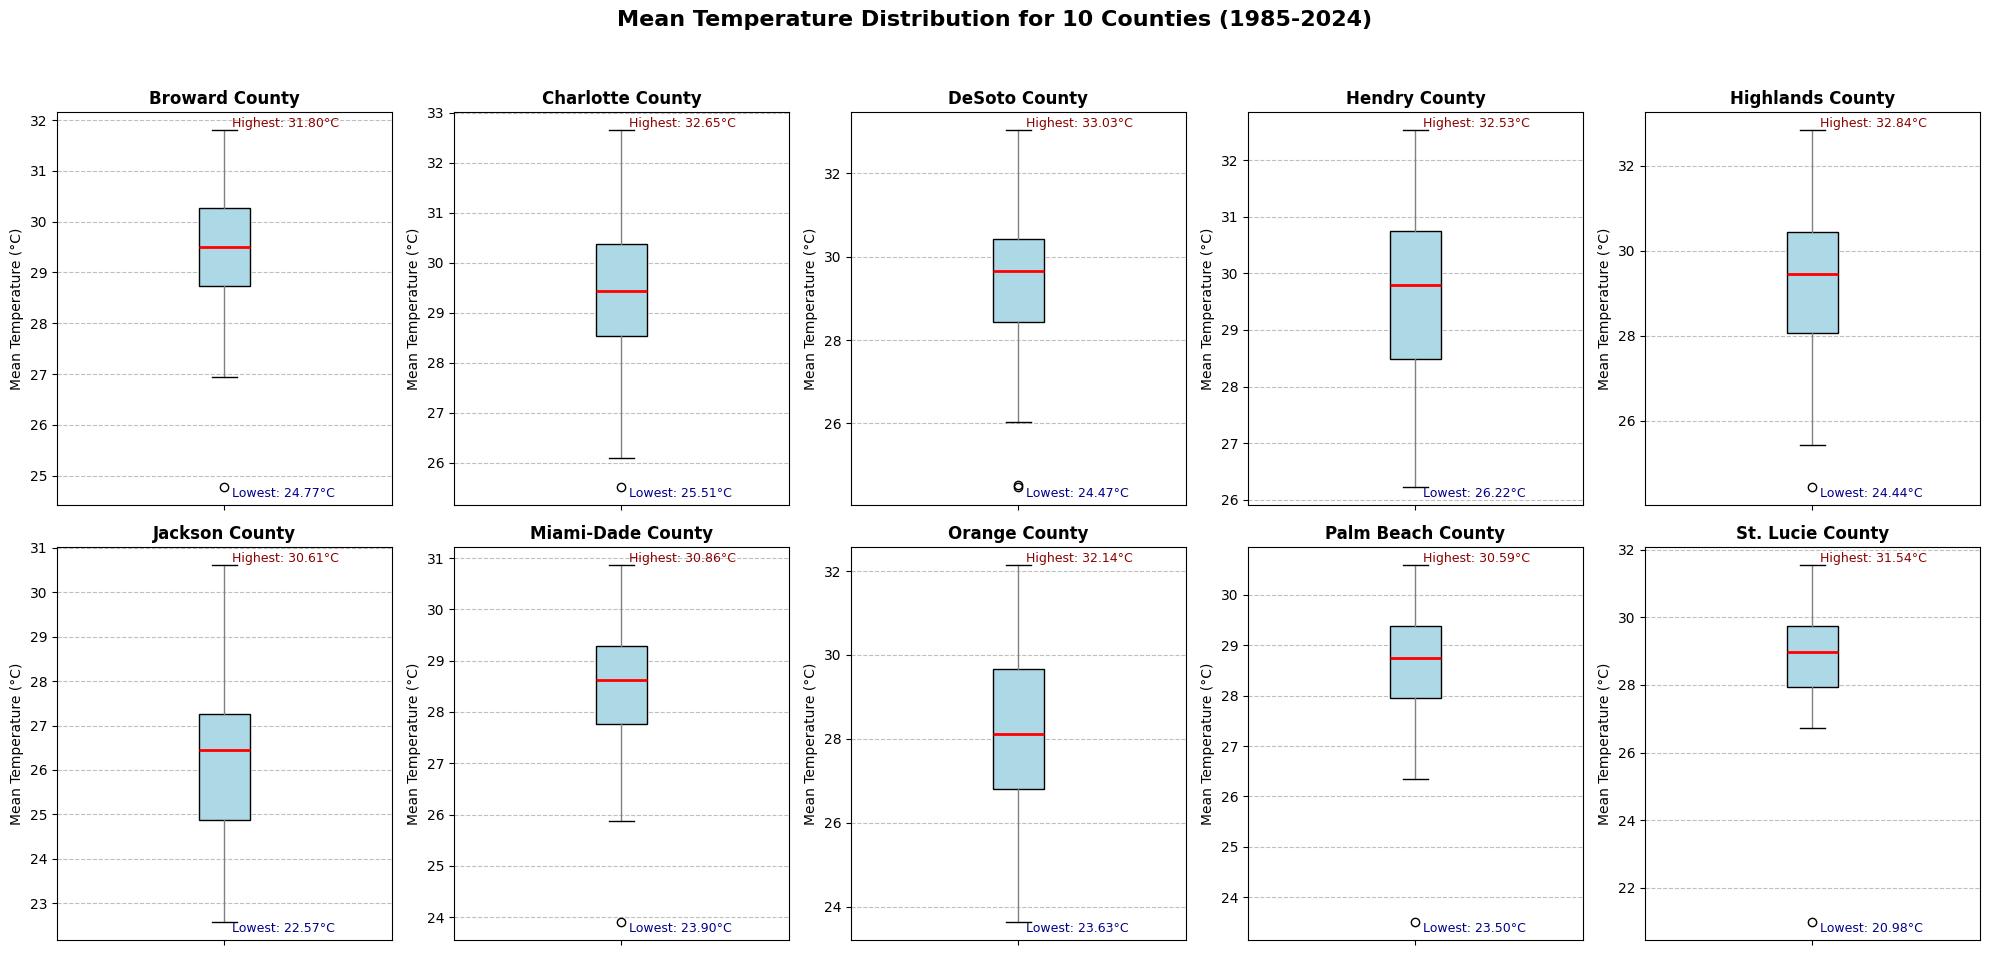

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# --- Data Loading and Preparation ---
try:
    # Read the dataset from the uploaded file
    df = pd.read_csv('LST_Results_County_1985-2024.csv')

    # Select the first 10 counties for plotting
    df_to_plot = df.head(10)

    # --- Plotting ---

    # Create a figure and a grid of subplots (2 rows, 5 columns)
    # The figsize is adjusted for better readability
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

    # Flatten the 2D array of axes to a 1D array for easy iteration
    axes = axes.flatten()

    # --- Generate a Boxplot for Each County ---

    # Iterate over the first 10 counties and their corresponding subplots
    for i, ax in enumerate(axes):
        if i < len(df_to_plot):
            # Get the data for the current county
            county_row = df_to_plot.iloc[i]
            county_name = county_row['Region']

            # Extract temperature values, which start from the 3rd column.
            # Convert them to a numeric type (float) for plotting.
            temperatures = pd.to_numeric(county_row.iloc[2:], errors='coerce').dropna()

            # --- Create the Boxplot ---
            # The patch_artist=True argument allows us to fill the box with color
            box = ax.boxplot(temperatures, patch_artist=True, vert=True)

            # --- Customization and Annotations ---

            # Set a title for the subplot
            ax.set_title(county_name, fontsize=12, weight='bold')

            # Set the label for the y-axis
            ax.set_ylabel('Mean Temperature (°C)')

            # Hide the x-axis tick labels as they are not needed for a single box
            ax.set_xticklabels([''])

            # Style the boxplot for better visualization
            box['boxes'][0].set_facecolor('lightblue')
            box['medians'][0].set_color('red')
            box['medians'][0].set_linewidth(2)
            box['whiskers'][0].set_color('gray')
            box['whiskers'][1].set_color('gray')
            box['caps'][0].set_color('black')
            box['caps'][1].set_color('black')

            # Find the lowest and highest temperatures to display them
            min_temp = temperatures.min()
            max_temp = temperatures.max()

            # Add text annotations for the lowest and highest temperatures
            # The text is placed just above the max and just below the min for clarity
            ax.text(1, max_temp, f'  Highest: {max_temp:.2f}°C',
                    verticalalignment='bottom', fontsize=9, color='darkred')
            ax.text(1, min_temp, f'  Lowest: {min_temp:.2f}°C',
                    verticalalignment='top', fontsize=9, color='darkblue')

            # Add a grid for easier reading of values
            ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.5)

    # Add a main title for the entire figure
    fig.suptitle('Mean Temperature Distribution for 10 Counties (1985-2024)', fontsize=16, weight='bold')

    # Adjust the layout to prevent titles and labels from overlapping
    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for suptitle

    # Display the plot
    plt.show()

except FileNotFoundError:
    print("Error: The file 'LST_Results_County_1985-2024.csv' was not found.")
    print("Please make sure the CSV file is in the same directory as the script.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")



In [2]:
import pandas as pd

# --- Data Loading and Preparation ---
try:
    # Read the dataset from the uploaded file
    df = pd.read_csv('LST_Results_County_1985-2024.csv')

    # --- Select Relevant Columns ---
    # We only need the county name and the temperature columns for 1985 and 2024.
    county_col = 'Region'
    temp_1985_col = 'LST_1985 (°C)'
    temp_2024_col = 'LST_2024 (°C)'

    # Create a new DataFrame with just the necessary data
    temp_diff_df = df[[county_col, temp_1985_col, temp_2024_col]].copy()

    # --- Calculate Temperature Difference ---
    # Compute the difference between 2024 and 1985 temperatures
    temp_diff_df['Difference (°C)'] = temp_diff_df[temp_2024_col] - temp_diff_df[temp_1985_col]

    # --- Rename columns for clarity ---
    temp_diff_df.rename(columns={
        county_col: 'County',
        temp_1985_col: 'Temp 1985 (°C)',
        temp_2024_col: 'Temp 2024 (°C)'
    }, inplace=True)


    # --- Display the Resulting Table ---
    # Set the 'County' column as the index for better readability
    temp_diff_df.set_index('County', inplace=True)

    # Display the final table
    # Using a print statement to ensure it displays well in various environments
    print("Temperature Difference from 1985 to 2024 by County:")
    print(temp_diff_df)


except FileNotFoundError:
    print("Error: The file 'LST_Results_County_1985-2024.csv' was not found.")
    print("Please make sure the CSV file is in the same directory as the script.")
except KeyError as e:
    print(f"Error: A required column was not found in the CSV file: {e}")
    print("Please check the column names in your file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


Temperature Difference from 1985 to 2024 by County:
                   Temp 1985 (°C)  Temp 2024 (°C)  Difference (°C)
County                                                            
Broward County              30.26           29.92            -0.34
Charlotte County            31.04           30.16            -0.88
DeSoto County               29.89           30.28             0.39
Hendry County               29.76           30.74             0.98
Highlands County            28.36           30.16             1.80
Jackson County              30.61           27.01            -3.60
Miami-Dade County           29.01           28.43            -0.58
Orange County               26.64           28.99             2.35
Palm Beach County           29.36           29.09            -0.27
St. Lucie County            28.48           29.68             1.20
